<a href="https://colab.research.google.com/github/Brenorp/LogisticRegressionDiabetesClassifier/blob/main/LogReg_DiabetesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_study/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

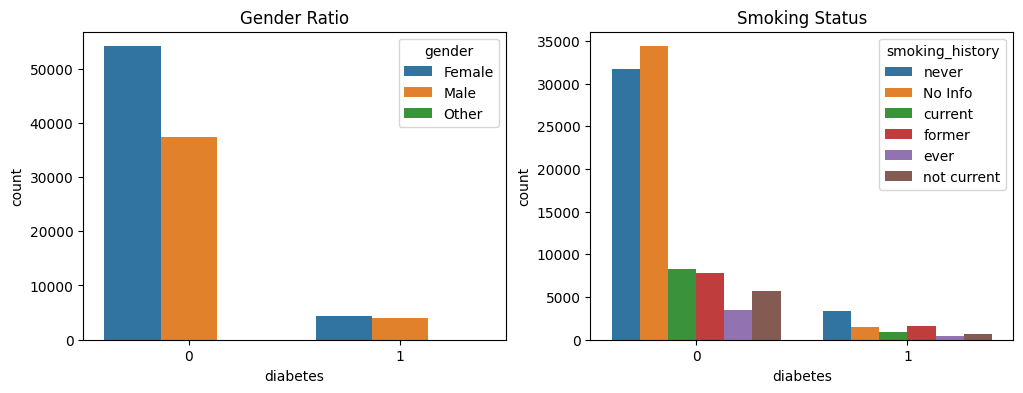

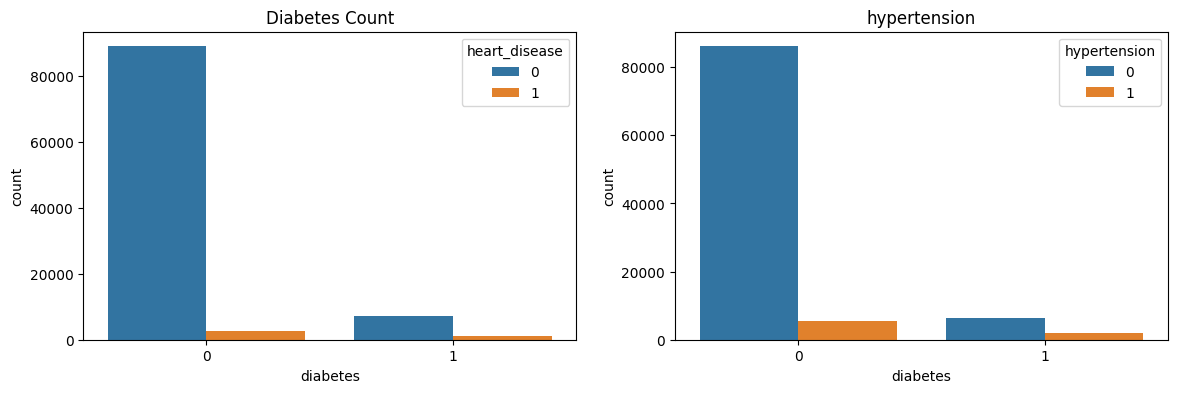

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="gender")
plt.title('Gender Ratio')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="smoking_history")
plt.title('Smoking Status')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="heart_disease")
plt.title('Diabetes Count')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="hypertension")
plt.title('hypertension')

plt.show()

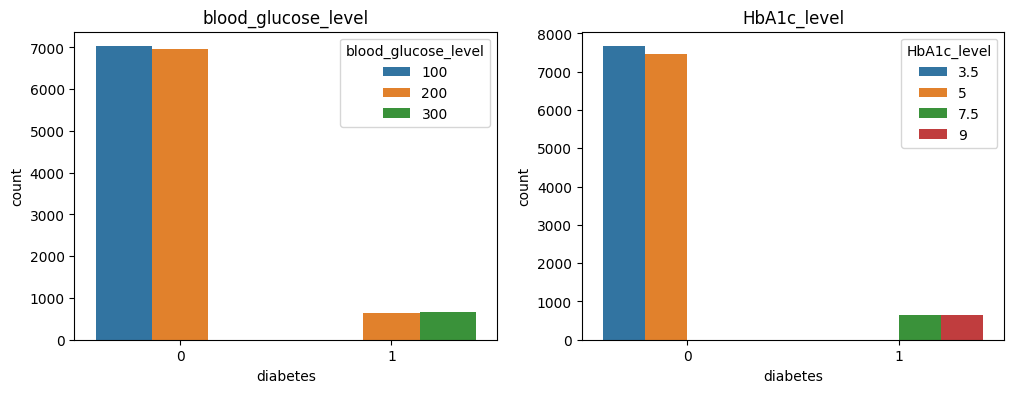

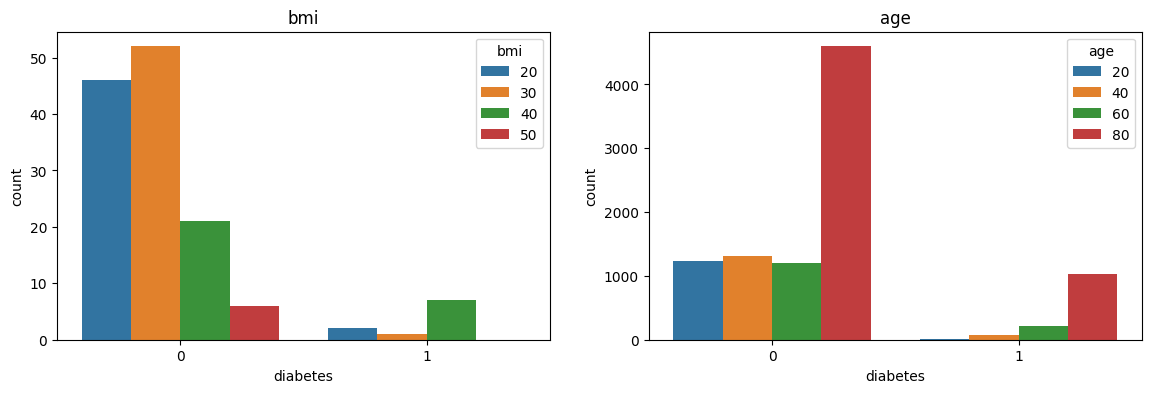

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="blood_glucose_level", hue_order= [100, 200, 300])
plt.title('blood_glucose_level')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="HbA1c_level", hue_order=[3.5, 5, 7.5, 9])
plt.title('HbA1c_level')

plt.figure(figsize=(14,4))

plt.subplot(121)
sns.countplot(x = "diabetes", data=df, hue="bmi", hue_order=[20, 30, 40, 50])
plt.title('bmi')

plt.subplot(122)
sns.countplot(x = "diabetes", data=df, hue="age", hue_order=[20, 40, 60, 80])
plt.title('age')

plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_study/diabetes_prediction_dataset.csv")

#substitute string data to int
df['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
df['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)

#divide X and y features
y = df.pop('diabetes')
X = df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) #split data into training and testing datasets

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


#create model class
class LogisticRegression():
    #class constructor
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        #initializing regression model
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0

        for _ in range(self.iterations):

            #prediction update
            linear_prediction = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_prediction)

            #binary cross-entropy loss functions (error functions)
            error_weight = (1/samples) * np.dot(X.T, (predictions - y))
            error_bias = (1/samples) * np.sum(predictions-y)

            #gradient descent updates
            self.weights = self.weights - self.learning_rate*error_weight
            self.bias = self.bias - self.learning_rate*error_bias


    def predict(self, X):
        linear_prediction = np.dot(X, self.weights) + self.bias
        y_prediction = sigmoid(linear_prediction)
        binary_classifier = [0 if y<=0.5 else 1 for y in y_prediction]
        return binary_classifier

In [ ]:

log_reg = LogisticRegression(learning_rate = 0.01, iterations= 10000) #initalize LR model object

log_reg.fit(X_train, y_train) #train model

y_pred = log_reg.predict(X_test) #use trained model to predict values in test dataset


In [ ]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test) #determine accuracy of model
print("precision: ", acc)

precision:  0.95975


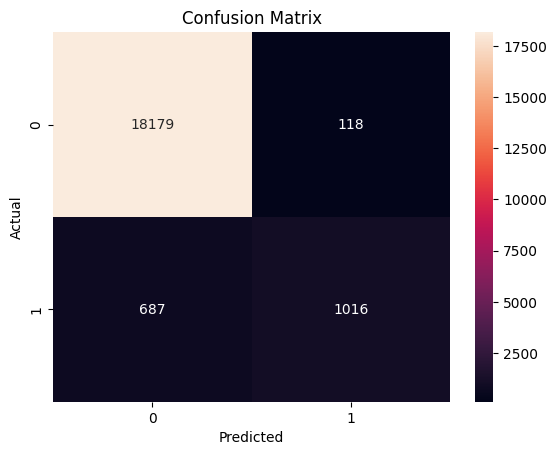

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()